# Examples for running FLORIS_loads_DR

In [1]:
# load modules
from floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setup floris and process input file

In [2]:
floris = Floris("Input_NREL5MW_SWF_3WT_8mps.json")
#floris = Floris("example_input.json")

## Calculate Wake

In [3]:
import time

t1 = time.time()

floris.farm.flow_field.calculate_wake()

t2 = time.time()

print('Time to compute wake = ', t2-t1, 's')

Time to compute wake =  0.012410879135131836 s


## Compute Velocities at each Turbine

In [4]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tpow_scale -", turbine.pow_scale)
    print("\tyaw_angle - ", turbine.yaw_angle)
    print("\tai -", turbine.aI)
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.48390057]
	Ct - [0.76293975]
	power - [1685420.18637547]
	pow_scale - 1.0
	yaw_angle -  0.0
	ai - [0.25655583]
	average velocity - 7.85065163365446
(806.0, 0.0):
	Cp - [0.47908381]
	Ct - [0.73097301]
	power - [935361.30463895]
	pow_scale - 1.0
	yaw_angle -  0.0
	ai - [0.24066094]
	average velocity - 6.47308024284217
(1612.0, 0.0):
	Cp - [0.47624763]
	Ct - [0.72254242]
	power - [842216.02423978]
	pow_scale - 1.0
	yaw_angle -  0.0
	ai - [0.23662879]
	average velocity - 6.263040872579965


## Visualization Manager for FLORIS 

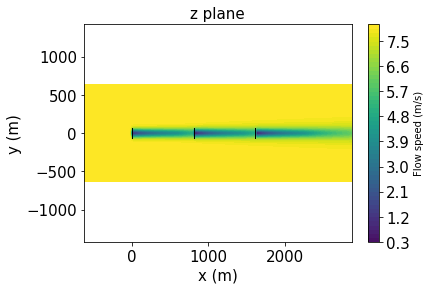

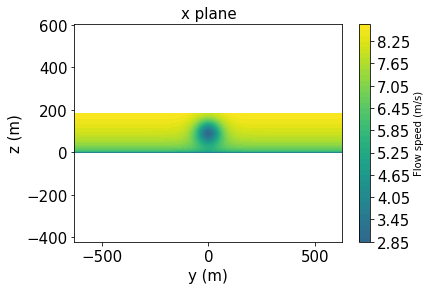

In [5]:
# Visualization
from copy import deepcopy
from floris.visualization import VisualizationManager

ff_viz = deepcopy(floris.farm.flow_field)
grid_resolution = (100, 100, 50)
visualization_manager = VisualizationManager(ff_viz, grid_resolution)
visualization_manager.plot_z_planes([0.5])
visualization_manager.plot_x_planes([0.5])

## Test Power Scale and Yaw Angle Adjusting

In [6]:
turbines    = [turbine for _, turbine in floris.farm.flow_field.turbine_map.items()]
turbines[0].pow_scale = 0.9
turbines[0].yaw_angle = 1 * np.pi / 180 # degree to rad
floris.farm.flow_field.calculate_wake()

In [7]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    print("\tCp -", turbine.Cp)
    print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    print("\tpow_scale -",turbine.pow_scale)
    print("\tai -", turbine.aI)
    print("\tyaw_angle -", turbine.yaw_angle * 180 / np.pi) # rad to degree
    print("\taverage velocity -", turbine.get_average_velocity())

(0.0, 0.0):
	Cp - [0.43551052]
	Ct - [0.59985468]
	power - [1516443.86750696]
	pow_scale - 0.9
	ai - [0.18370667]
	yaw_angle - 1.0
	average velocity - 7.85065163365446
(806.0, 0.0):
	Cp - [0.4810653]
	Ct - [0.74211941]
	power - [1060560.84024022]
	pow_scale - 1.0
	ai - [0.24609028]
	yaw_angle - 0.0
	average velocity - 6.74060489909392
(1612.0, 0.0):
	Cp - [0.47709263]
	Ct - [0.72505419]
	power - [869254.09308093]
	pow_scale - 1.0
	ai - [0.23782363]
	yaw_angle - 0.0
	average velocity - 6.32561906161646


## Sweep Power Scale and Yaw Angle of turbine_0 

In [8]:
pow_scale_0 = np.arange(0.6,1.01,0.01)
yaw_angle_0 = np.arange(0,26,1)

pow2_0 = np.zeros([41,26])
pow2_1 = np.zeros([41,26])
pow2_2 = np.zeros([41,26])

for p_idx_0, p0 in enumerate(pow_scale_0):
    turbines[0].pow_scale = p0
    for y_idx_0, y0 in enumerate(yaw_angle_0):
        turbines[1].pow_scale = y0 * np.pi / 180  # degree to rad
        floris.farm.flow_field.calculate_wake()
        pow2_0[p_idx_0, y_idx_0] = turbines[0].power
        pow2_1[p_idx_0, y_idx_0] = turbines[1].power
        pow2_2[p_idx_0, y_idx_0] = turbines[2].power

pow2_t = pow2_0 + pow2_1 + pow2_2

ValueError: shape mismatch: objects cannot be broadcast to a single shape

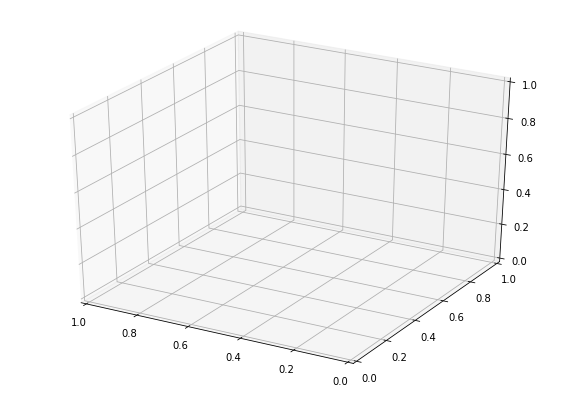

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.invert_xaxis()
#ax.invert_yaxis()
ax.plot_surface(pow_scale_0, yaw_angle_0, pow2_t/1e6, \
                rstride=2, cstride=2, cmap=cm.rainbow,linewidth=0.5, antialiased=True)
ax.set_xlabel('pow_scale of Turb_0')
ax.set_ylabel('pow_scale of Turb_1')
ax.set_zlabel('Tatal power of WF (MW)')
plt.show()

In [10]:
pow2_t_max = np.max(pow2_t)
pow2_t_max_idx = np.where(pow2_t == np.max(pow2_t))
pow_scale_0_max = 0.6 + pow2_t_max_idx[0][0]*0.01
yaw_angle_0_max = 0 + pow2_t_max_idx[1][0]*1

print('The orginal power of WF is',round(pow2_t[40][25]/1e6,2),'MW')
print('The maximum power of WF is',round(pow2_t_max/1e6,2),'MW')
print('The power increase of WF is',round((pow2_t_max - pow2_t[40][25])/1e6,2),'MW')
print('The corresponding power scale of Turb_0:',round(pow_scale_0_max,2))
print('The corresponding yaw angle of Turb_0:',round(yaw_angle_0_max,2))

The orginal power of WF is 3.31 MW
The maximum power of WF is 3.32 MW
The power increase of WF is 0.01 MW
The corresponding power scale of Turb_0: 0.99
The corresponding yaw angle of Turb_0: 0
